In [1]:
#import the necessary files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\balas\Desktop\Datasets\abalone.csv")

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
df['age'] = df['Rings']+1.5
df = df.drop('Rings', axis = 1)

### EDA

<AxesSubplot:>

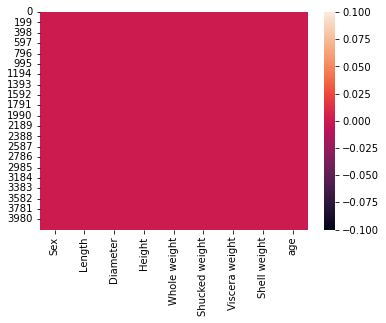

In [6]:
sns.heatmap(df.isnull())

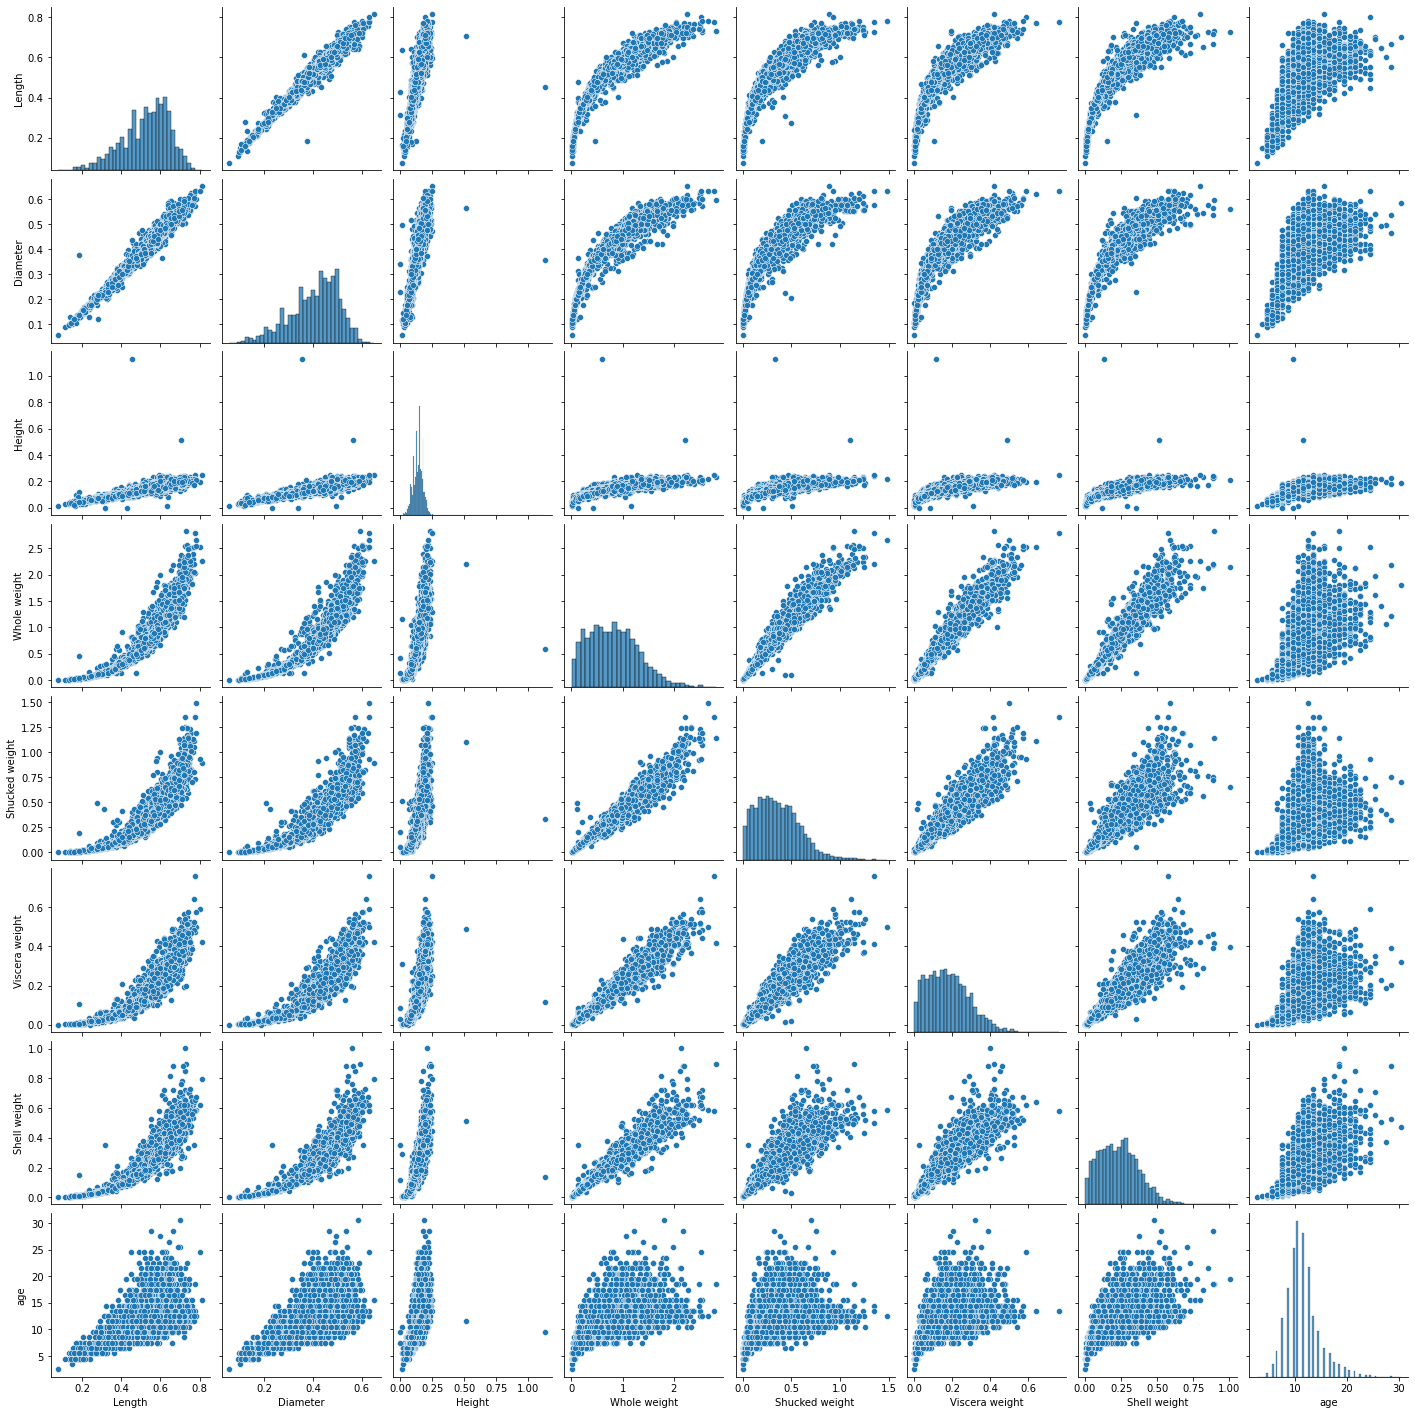

In [7]:
sns.pairplot(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [9]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

C:\Users\balas\AppData\Local\Temp\ipykernel_19644\3796453440.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include = [np.object]).columns


In [10]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [11]:
categorical_features

Index(['Sex'], dtype='object')

<AxesSubplot:>

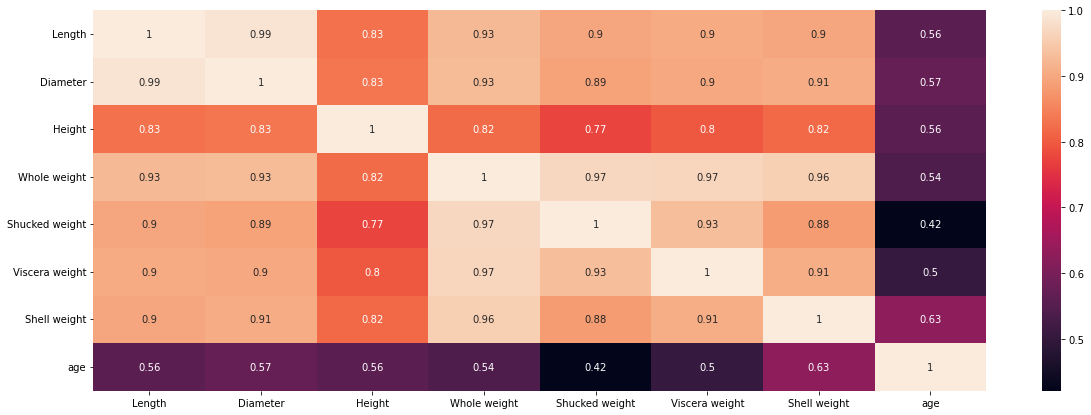

In [12]:
plt.figure(figsize = (20,7))
sns.heatmap(df[numerical_features].corr(),annot = True)

<AxesSubplot:xlabel='Sex', ylabel='count'>

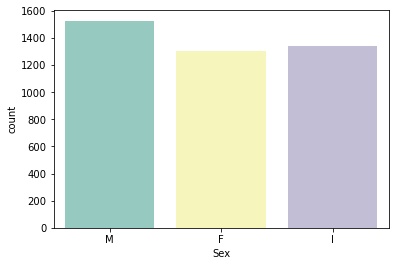

In [13]:
sns.countplot(x = 'Sex', data = df, palette = 'Set3')

C:\Users\balas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\balas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\balas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='age'>

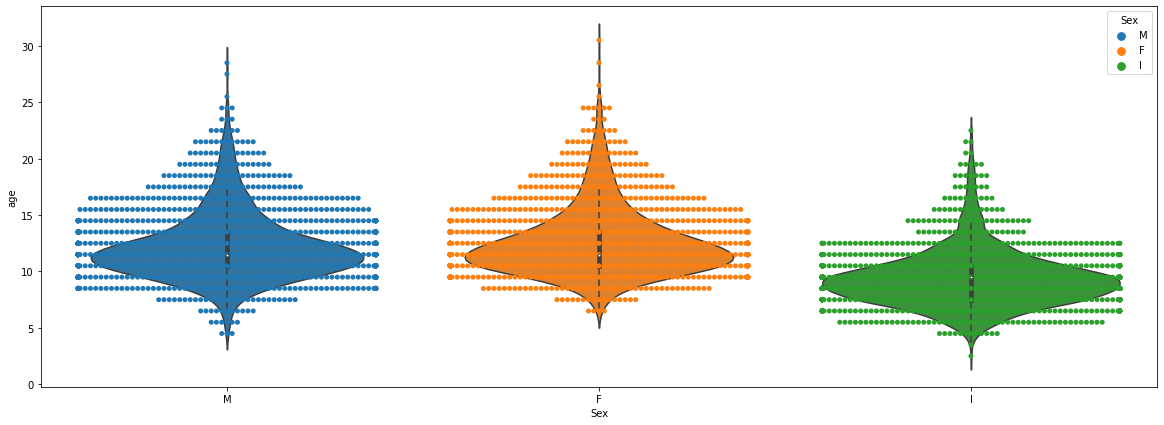

In [14]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'age',data = df)

Male : age majority lies in between 8 years to 19 years
Female: age majority lies in between 7.5 years to 18 years
Infant: age majority lies in between 6 years to < 15 years

## Data Preprocessing

In [15]:
# outlier handling
df = pd.get_dummies(df)
dummy_df = df

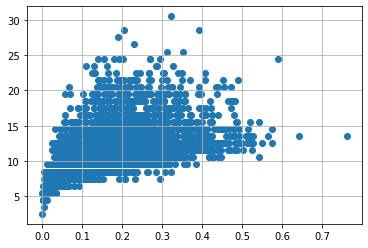

In [16]:
var = 'Viscera weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [17]:
df.drop(df[(df['Viscera weight'] > 0.5) &
          (df['age'] < 20)].index, inplace = True)
df.drop(df[(df['Viscera weight']<0.5) & (
df['age'] > 25)].index, inplace = True)

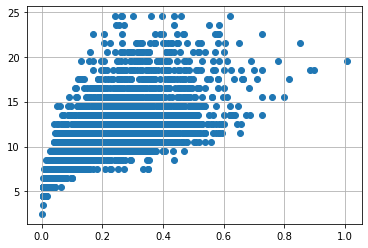

In [18]:
var = 'Shell weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [19]:
df.drop(df[(df['Shell weight'] > 0.6) &
          (df['age'] < 25)].index, inplace = True)
df.drop(df[(df['Shell weight']<0.8) & (
df['age'] > 25)].index, inplace = True)

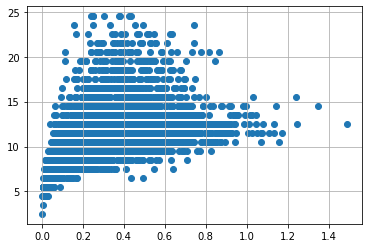

In [20]:
var = 'Shucked weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [21]:
df.drop(df[(df['Shucked weight'] >= 1) &
          (df['age'] < 20)].index, inplace = True)
df.drop(df[(df['Viscera weight']<1) & (
df['age'] > 20)].index, inplace = True)

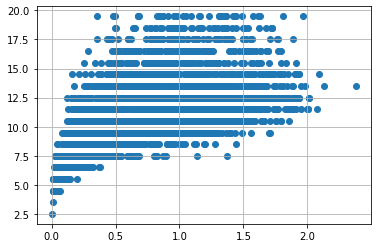

In [22]:
var = 'Whole weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [23]:
df.drop(df[(df['Whole weight'] >= 2.5) &
          (df['age'] < 25)].index, inplace = True)
df.drop(df[(df['Whole weight']<2.5) & (
df['age'] > 25)].index, inplace = True)

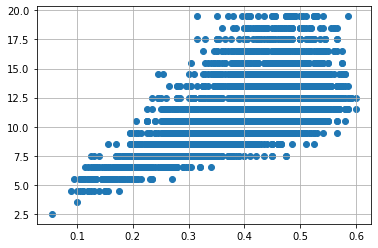

In [24]:
var = 'Diameter'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [25]:
df.drop(df[(df['Diameter'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Diameter']<0.6) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Diameter']>=0.6) & (
df['age'] < 25)].index, inplace = True)

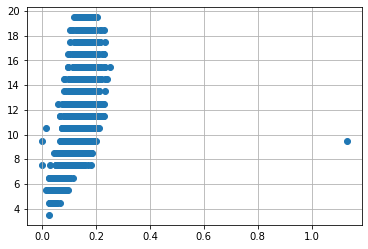

In [26]:
var = 'Height'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [27]:
df.drop(df[(df['Height'] > 0.4) &
          (df['age'] < 15)].index, inplace = True)
df.drop(df[(df['Height']<0.4) & (
df['age'] > 25)].index, inplace = True)

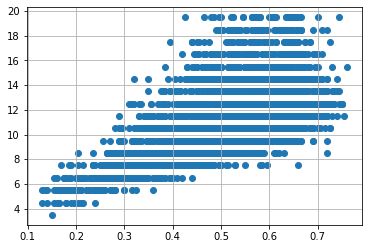

In [28]:
var = 'Length'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [29]:
df.drop(df[(df['Length'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Length']<0.8) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Length']>=0.8) & (
df['age'] < 25)].index, inplace = True)

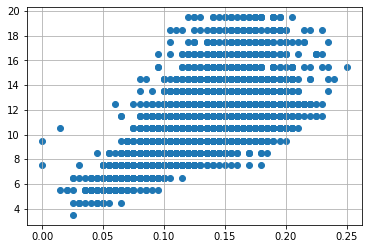

In [30]:
var = 'Height'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

# Feature Selection and Standardization

In [31]:
X = df.drop('age', axis = 1)
y = df['age']

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest

In [33]:
standardScale = StandardScaler()
standardScale.fit_transform(X)
selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)

# Model Selection
# 1)Linear regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [36]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

Mean Squared error of training set :3.480110
Mean Squared error of testing set :3.803648


In [38]:
from sklearn.metrics import r2_score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)
p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

R2 Score of training set:0.54
R2 Score of testing set:0.52


# 2)Ridge

In [39]:
from sklearn.linear_model import Ridge

In [40]:
ridge_mod = Ridge(alpha=0.01, normalize=True)
ridge_mod.fit(X_train, y_train)
ridge_mod.fit(X_test, y_test)
ridge_model_pred = ridge_mod.predict(X_test)
ridge_mod.score(X_train, y_train)

C:\Users\balas\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\balas\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

0.5256922711171801

In [41]:
ridge_mod.score(X_test, y_test)

0.5224912787107051

Text(0, 0.5, 'Predictions')

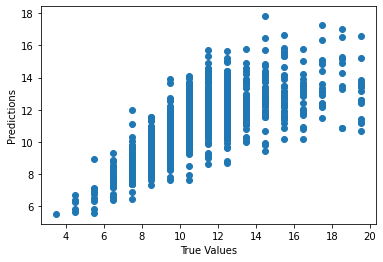

In [42]:
plt.scatter(y_test, ridge_model_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# 3)Support vector Regression

In [43]:
from sklearn.svm import SVR

In [44]:
# LINEAR KERNEL

svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)
svr.fit(X_test, y_test)

SVR(kernel='linear')

In [45]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)
svr.score(X_train, y_train)

0.44490116841809624

In [46]:
svr.score(X_test, y_test)

0.4416363260773404

# 4) RandomForestRegression

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
regr = RandomForestRegressor(max_depth=2, random_state=0,
                              n_estimators=100)

In [49]:
regr.fit(X_train, y_train)
regr.fit(X_test, y_test)

RandomForestRegressor(max_depth=2, random_state=0)

In [50]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

In [51]:
regr.score(X_train, y_train)

0.41880322698487704

In [52]:
regr.score(X_test, y_test)

0.45989384286201274

# 5)Gradient Boosting Regressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

In [54]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr.fit(X_test, y_test)

GradientBoostingRegressor()

In [55]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

In [56]:
regr.score(X_train, y_train)

0.41880322698487704

In [57]:
regr.score(X_test, y_test)

0.45989384286201274

# Building a Regression Model

### Data Visualizations
###### Univariate Analysis

In [58]:
import numpy as np
import pandas as pd
import sklearn

In [59]:
df = pd.read_csv(r"C:\Users\balas\Desktop\Datasets\abalone.csv")

In [60]:
df['age'] = df['Rings']+1.5
df = df.drop('Rings', axis = 1)

In [61]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


C:\Users\balas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

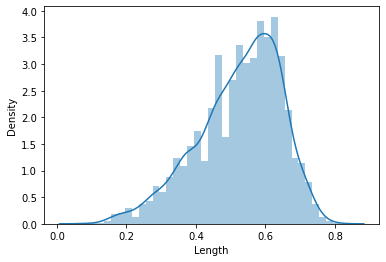

In [62]:
sns.distplot(df['Length'])

<AxesSubplot:xlabel='Length', ylabel='Count'>

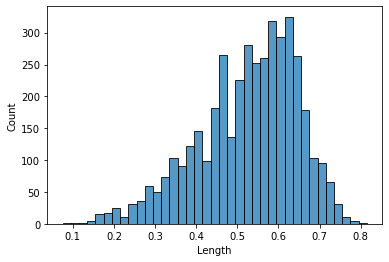

In [63]:
sns.histplot(df['Length'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length'>

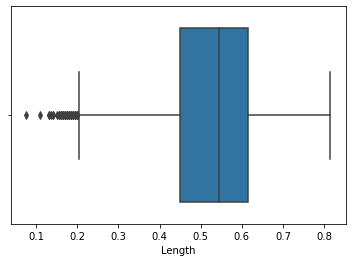

In [64]:
sns.boxplot(df['Length'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Diameter', ylabel='Density'>

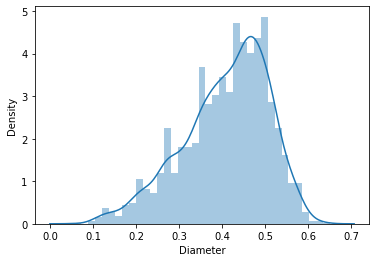

In [65]:
sns.distplot(df['Diameter'])

<AxesSubplot:xlabel='Diameter', ylabel='Count'>

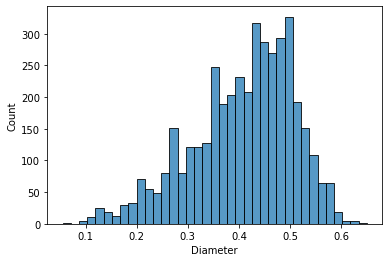

In [66]:
sns.histplot(df['Diameter'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diameter'>

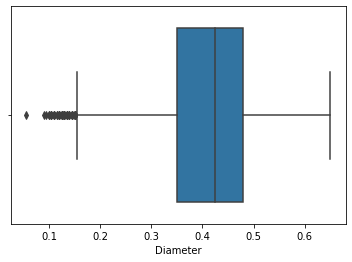

In [67]:
sns.boxplot(df['Diameter'])

In [68]:
###### Bivariate  Analysis

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Length'>

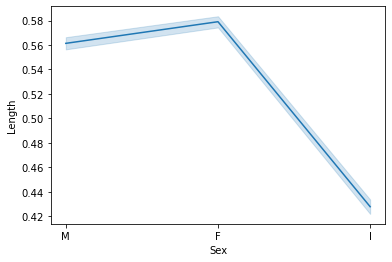

In [69]:
sns.lineplot(df['Sex'], df['Length'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Length'>

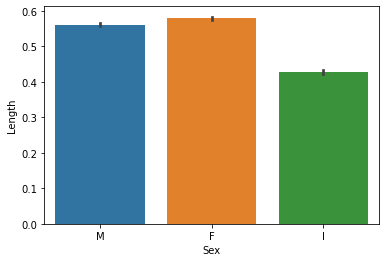

In [70]:
sns.barplot(df['Sex'], df['Length'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Length'>

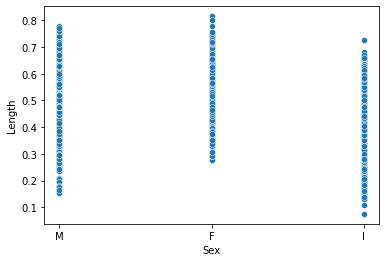

In [71]:
sns.scatterplot(df['Sex'], df['Length'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diameter', ylabel='Height'>

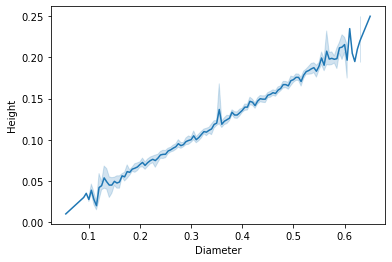

In [72]:
sns.lineplot(df['Diameter'], df['Height'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diameter', ylabel='Height'>

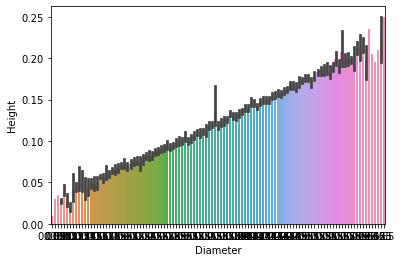

In [73]:
sns.barplot(df['Diameter'], df['Height'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diameter', ylabel='Height'>

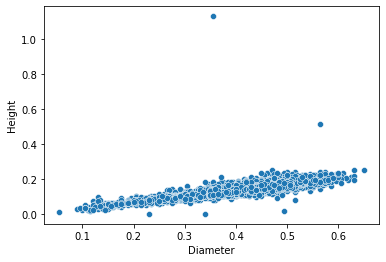

In [74]:
sns.scatterplot(df['Diameter'], df['Height'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='age'>

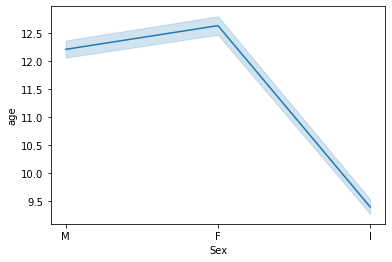

In [75]:
sns.lineplot(df['Sex'], df['age'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='age'>

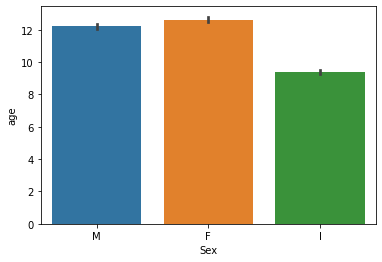

In [76]:
sns.barplot(df['Sex'], df['age'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='age'>

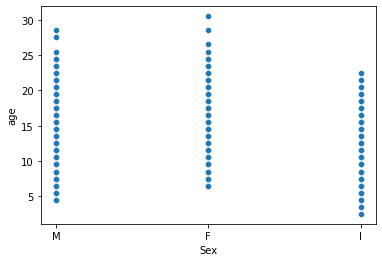

In [77]:
sns.scatterplot(df['Sex'], df['age'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Whole weight'>

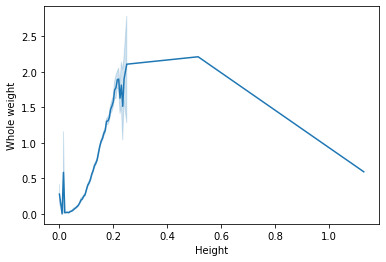

In [78]:
sns.lineplot(df['Height'], df['Whole weight'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Whole weight'>

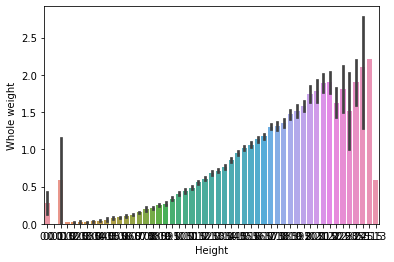

In [79]:
sns.barplot(df['Height'], df['Whole weight'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Whole weight'>

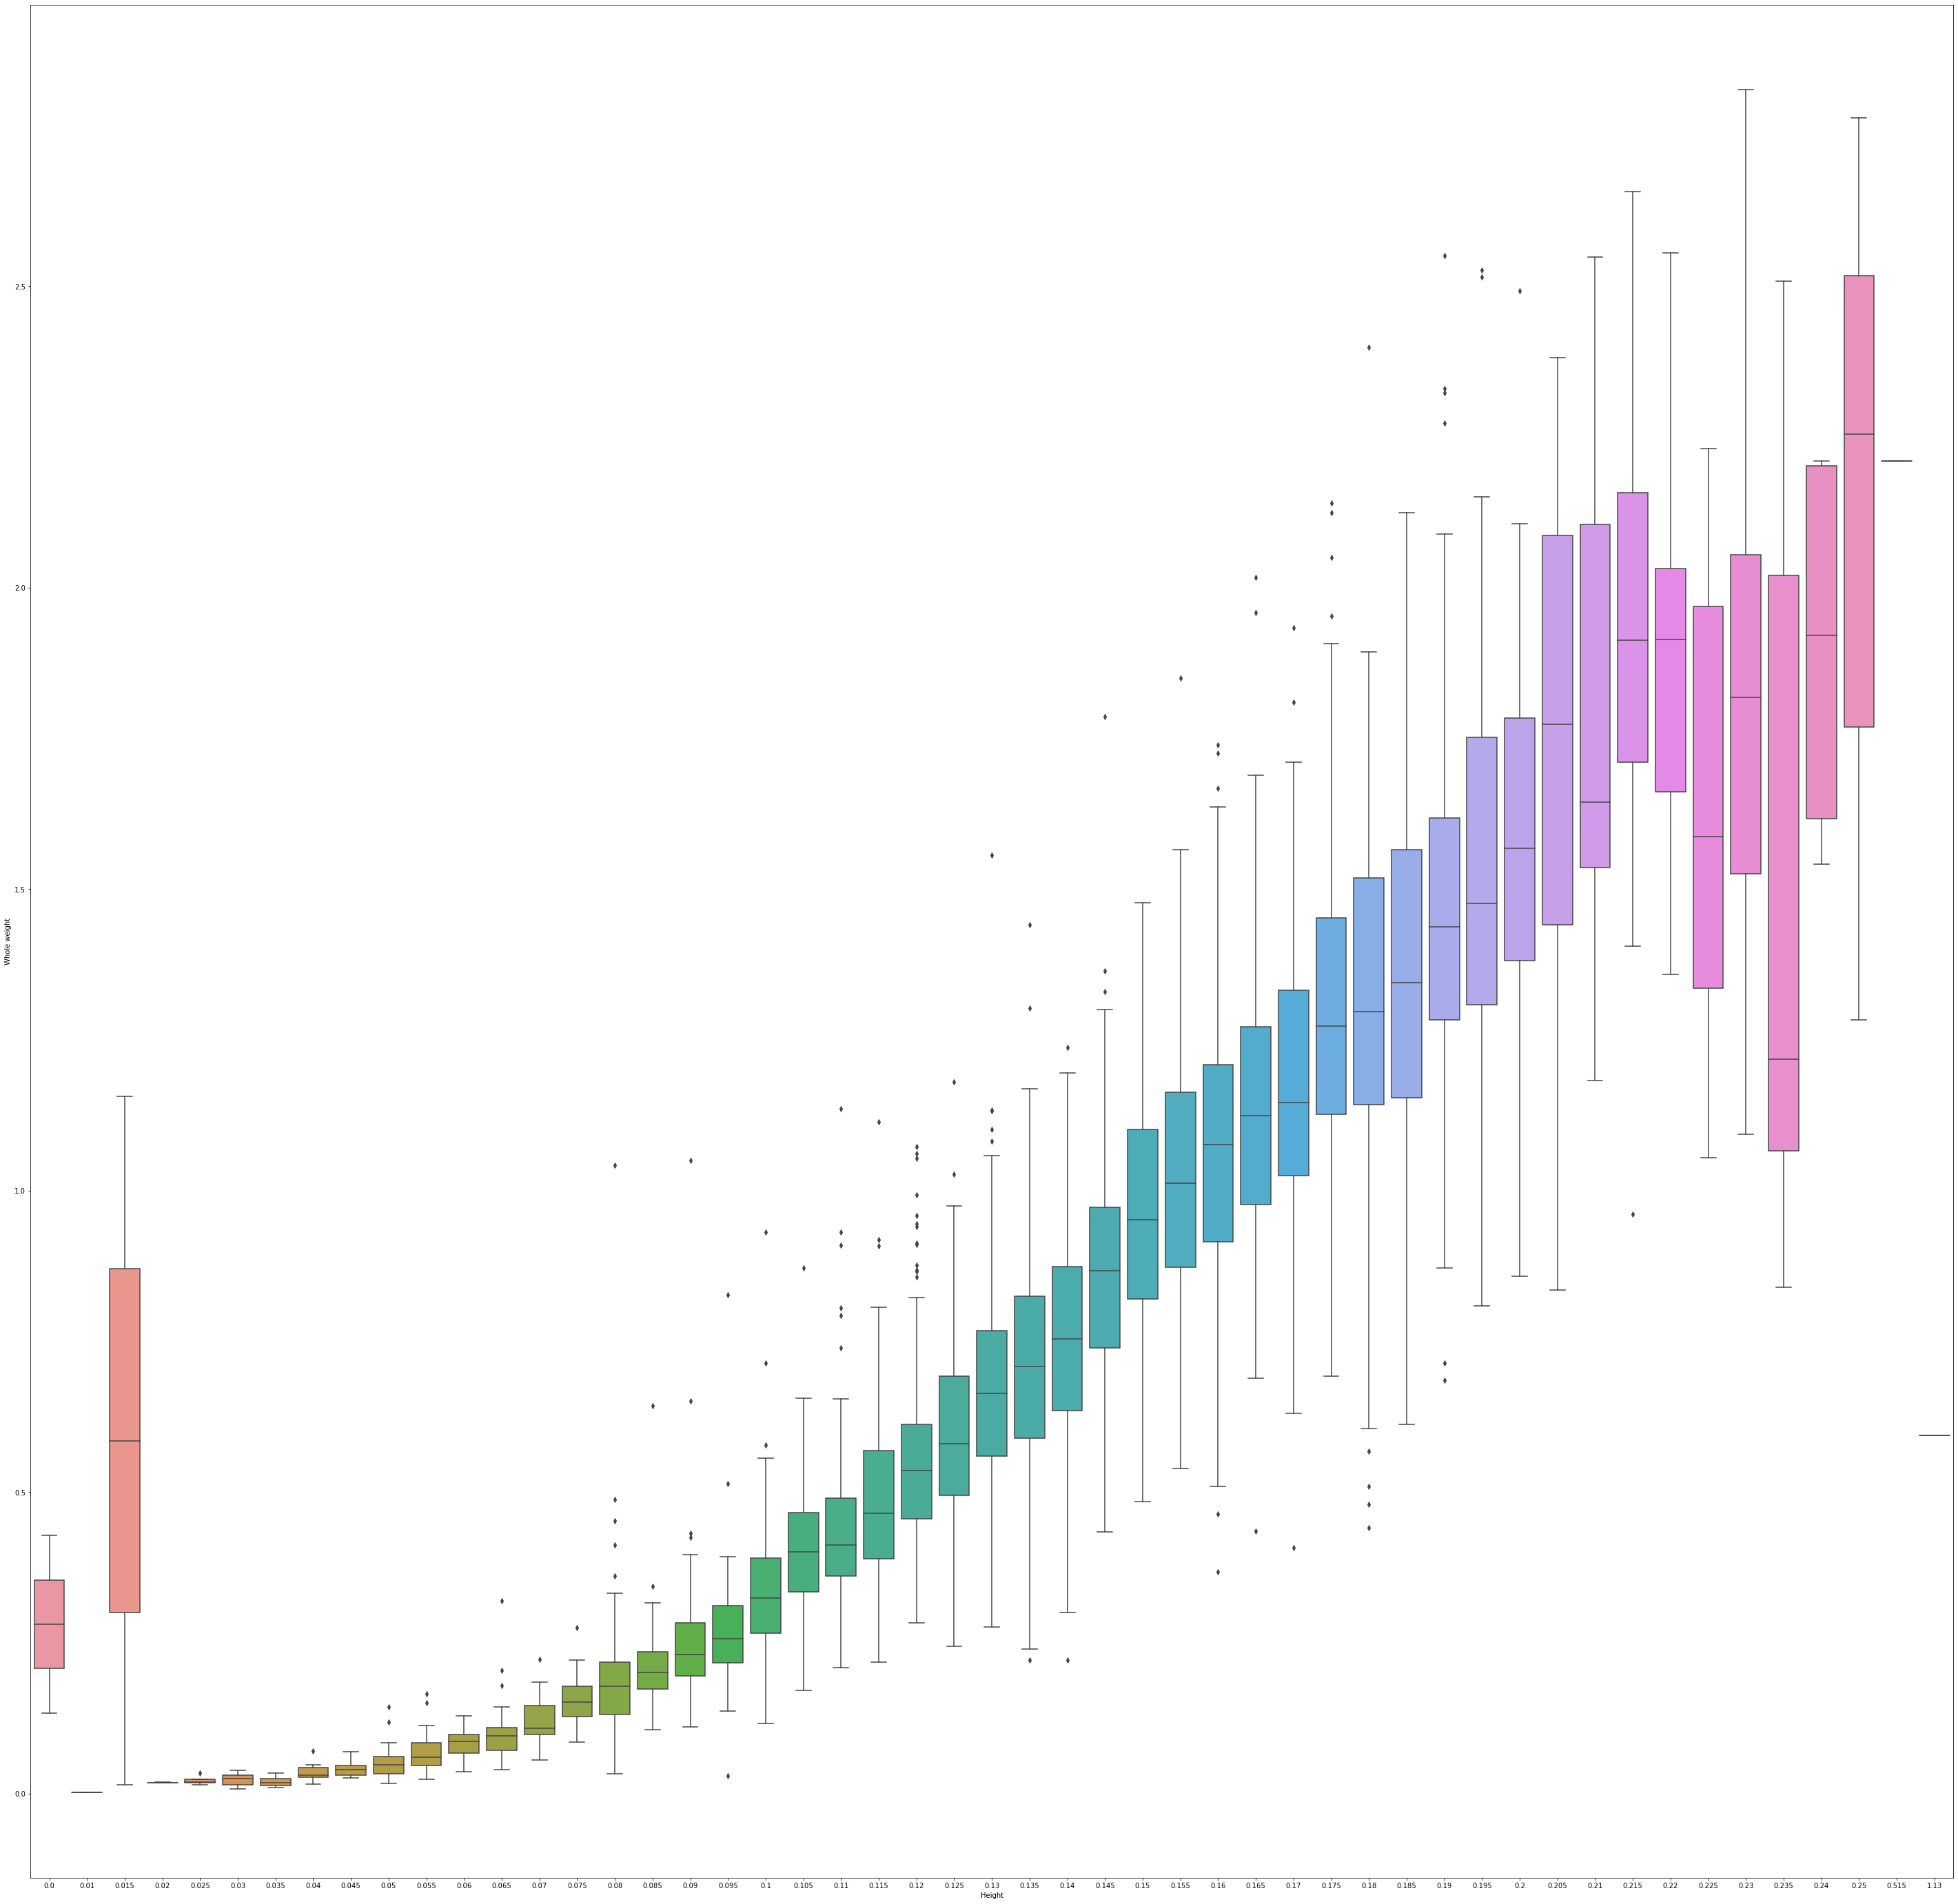

In [80]:
plt.figure(figsize=(50,50))
sns.boxplot(df['Height'], df['Whole weight'])

#### Multivariate Analysis

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Length'>

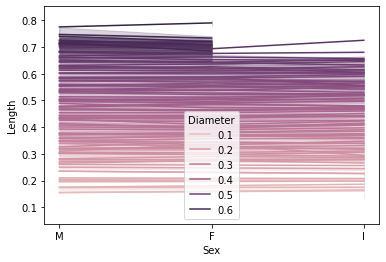

In [81]:
sns.lineplot(df['Sex'], df['Length'], hue = df['Diameter'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Length'>

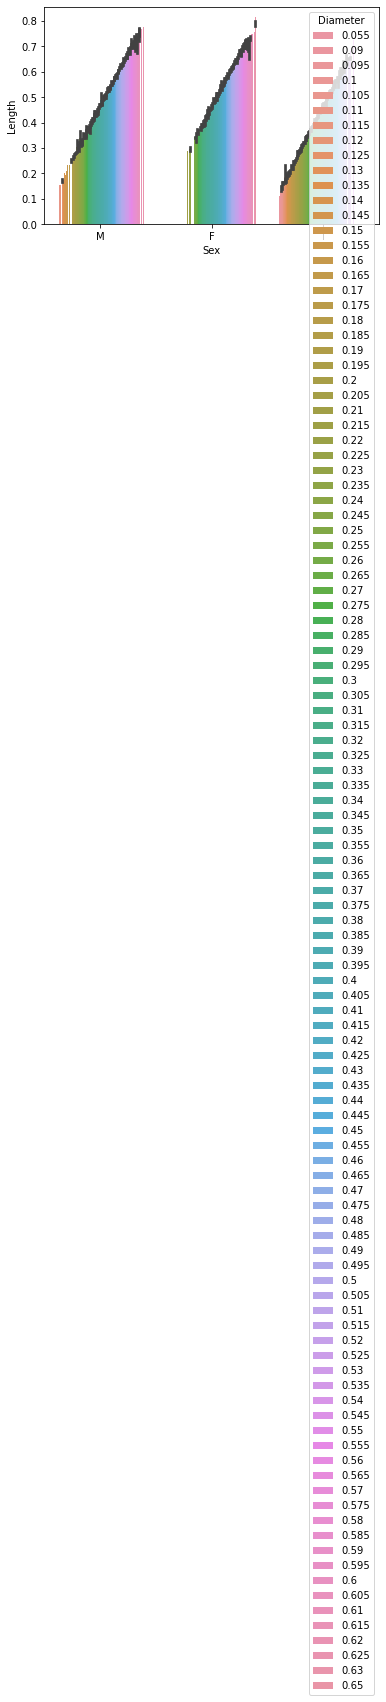

In [82]:
sns.barplot(df['Sex'], df['Length'], hue = df['Diameter'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Length'>

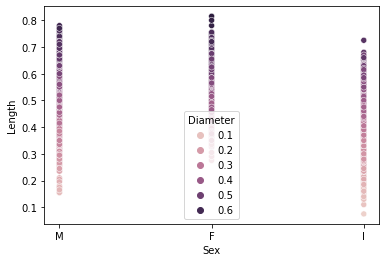

In [83]:
sns.scatterplot(df['Sex'], df['Length'], hue = df['Diameter'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Whole weight'>

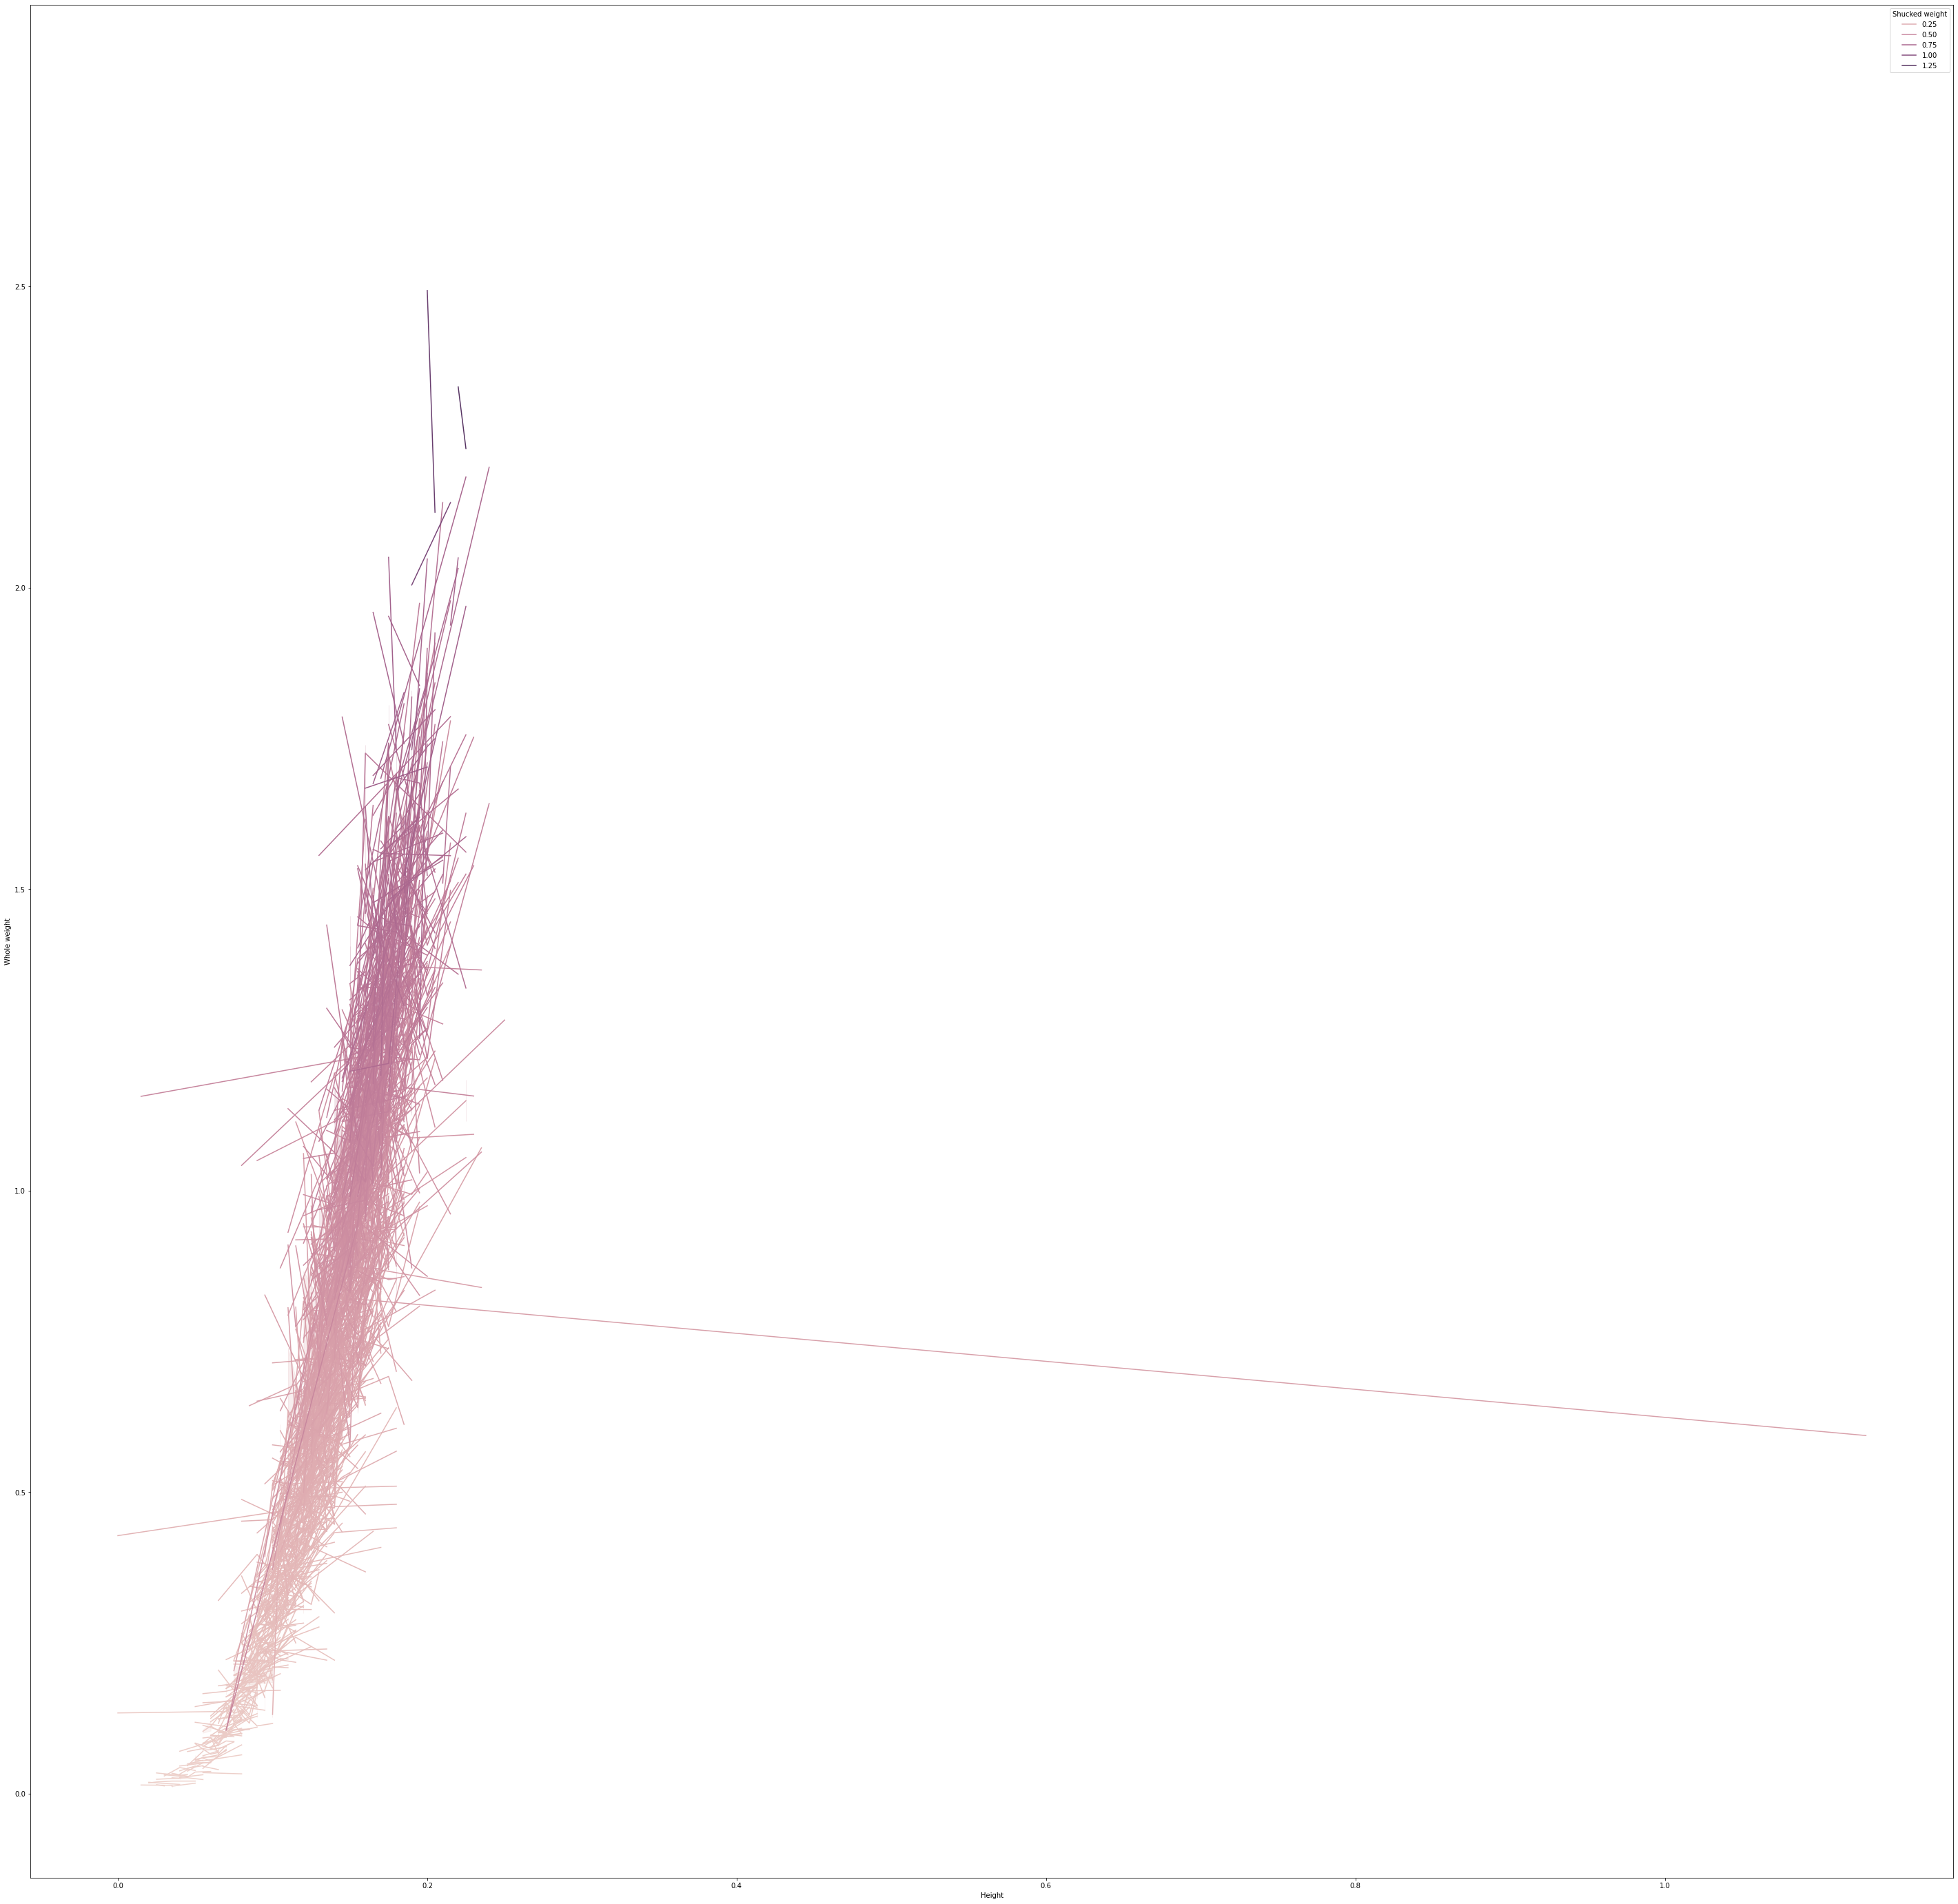

In [84]:
plt.figure(figsize=(50,50))
sns.lineplot(df['Height'], df['Whole weight'], hue = df['Shucked weight'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Viscera weight', ylabel='Shell weight'>

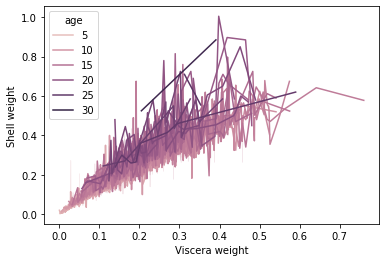

In [85]:
sns.lineplot(df['Viscera weight'], df['Shell weight'], hue = df['age'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Viscera weight', ylabel='Shell weight'>

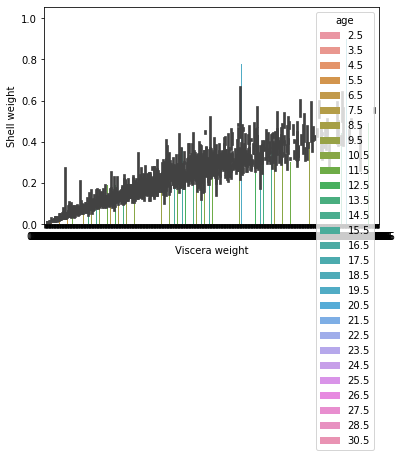

In [86]:
sns.barplot(df['Viscera weight'], df['Shell weight'], hue = df['age'])

#### Check for Missing values and deal with them.

In [87]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [88]:
df.shape

(4177, 9)

In [89]:
df.info

<bound method DataFrame.info of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight   age  
0             0.1010        0.1500  16.5  
1             0.0485        0.0700   8.5  
2             0.1415  

In [90]:
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [91]:
df.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
age               False
dtype: bool

In [92]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

In [93]:
df.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,10.5
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df['age'].unique()

array([16.5,  8.5, 10.5, 11.5,  9.5, 21.5, 17.5, 20.5, 15.5, 12.5, 13.5,
       19.5, 14.5,  6.5,  5.5,  7.5, 22.5, 18.5, 23.5,  2.5,  4.5, 27.5,
       24.5, 30.5,  3.5, 28.5, 26.5, 25.5])

In [95]:
df['age'].value_counts

<bound method IndexOpsMixin.value_counts of 0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: age, Length: 4177, dtype: float64>

In [96]:
# replacing the null values 
df['age'] = df['age'].fillna(df['age'].median())

In [97]:
df['age']

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: age, Length: 4177, dtype: float64

# Descriptive Statistics

In [98]:
df.mean()

C:\Users\balas\AppData\Local\Temp\ipykernel_19644\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Length             0.523992
Diameter           0.407881
Height             0.139516
Whole weight       0.828742
Shucked weight     0.359367
Viscera weight     0.180594
Shell weight       0.238831
age               11.433684
dtype: float64

In [99]:
df.median()

C:\Users\balas\AppData\Local\Temp\ipykernel_19644\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Length             0.5450
Diameter           0.4250
Height             0.1400
Whole weight       0.7995
Shucked weight     0.3360
Viscera weight     0.1710
Shell weight       0.2340
age               10.5000
dtype: float64

In [100]:
df.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,10.5
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
df.var()

C:\Users\balas\AppData\Local\Temp\ipykernel_19644\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
age               10.395266
dtype: float64

In [102]:
df.std()

C:\Users\balas\AppData\Local\Temp\ipykernel_19644\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Length            0.120093
Diameter          0.099240
Height            0.041827
Whole weight      0.490389
Shucked weight    0.221963
Viscera weight    0.109614
Shell weight      0.139203
age               3.224169
dtype: float64

In [103]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [104]:
df['age'].unique ()

array([16.5,  8.5, 10.5, 11.5,  9.5, 21.5, 17.5, 20.5, 15.5, 12.5, 13.5,
       19.5, 14.5,  6.5,  5.5,  7.5, 22.5, 18.5, 23.5,  2.5,  4.5, 27.5,
       24.5, 30.5,  3.5, 28.5, 26.5, 25.5])

In [105]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [106]:
df['age'].value_counts ()

10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
28.5      2
25.5      2
2.5       1
27.5      1
30.5      1
3.5       1
26.5      1
Name: age, dtype: int64

###  Find the outliers and replace them outliers

In [107]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

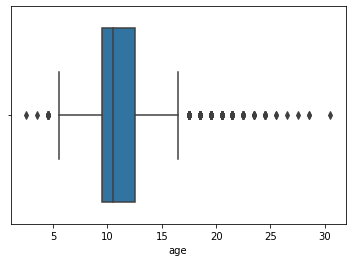

In [108]:
sns.boxplot(df['age'])

In [109]:
df['age'],df['Length'].unique()

(0       16.5
 1        8.5
 2       10.5
 3       11.5
 4        8.5
         ... 
 4172    12.5
 4173    11.5
 4174    10.5
 4175    11.5
 4176    13.5
 Name: age, Length: 4177, dtype: float64,
 array([0.455, 0.35 , 0.53 , 0.44 , 0.33 , 0.425, 0.545, 0.475, 0.55 ,
        0.525, 0.43 , 0.49 , 0.535, 0.47 , 0.5  , 0.355, 0.365, 0.45 ,
        0.38 , 0.565, 0.615, 0.56 , 0.58 , 0.59 , 0.605, 0.575, 0.68 ,
        0.665, 0.705, 0.465, 0.54 , 0.24 , 0.205, 0.21 , 0.39 , 0.46 ,
        0.325, 0.52 , 0.4  , 0.485, 0.405, 0.445, 0.245, 0.505, 0.595,
        0.31 , 0.555, 0.57 , 0.6  , 0.62 , 0.625, 0.695, 0.36 , 0.51 ,
        0.435, 0.495, 0.385, 0.515, 0.37 , 0.27 , 0.375, 0.7  , 0.71 ,
        0.265, 0.305, 0.345, 0.65 , 0.28 , 0.175, 0.17 , 0.635, 0.645,
        0.61 , 0.725, 0.235, 0.315, 0.225, 0.64 , 0.63 , 0.585, 0.42 ,
        0.335, 0.415, 0.275, 0.295, 0.075, 0.13 , 0.11 , 0.16 , 0.23 ,
        0.3  , 0.32 , 0.655, 0.66 , 0.2  , 0.165, 0.19 , 0.74 , 0.34 ,
        0.675, 0.745, 0

In [110]:
q = df.quantile([0.75,0.50])

In [111]:
q

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0.75,0.615,0.480,0.165,1.1530,0.502,0.253,0.329,12.5
0.50,0.545,0.425,0.140,0.7995,0.336,0.171,0.234,10.5


In [112]:
iqr = q.iloc[0] - q.iloc[1]

In [113]:
iqr

Length            0.0700
Diameter          0.0550
Height            0.0250
Whole weight      0.3535
Shucked weight    0.1660
Viscera weight    0.0820
Shell weight      0.0950
age               2.0000
dtype: float64

In [114]:
u = q.iloc[0] + (1.5*iqr) # q3 + 1.5*iqr

In [115]:
u

Length             0.72000
Diameter           0.56250
Height             0.20250
Whole weight       1.68325
Shucked weight     0.75100
Viscera weight     0.37600
Shell weight       0.47150
age               15.50000
dtype: float64

In [116]:
l = q.iloc[1] - (1.5*iqr)

In [117]:
l

Length            0.44000
Diameter          0.34250
Height            0.10250
Whole weight      0.26925
Shucked weight    0.08700
Viscera weight    0.04800
Shell weight      0.09150
age               7.50000
dtype: float64

In [118]:
## handling outliers

df['age'] = np.where(df['age']>10,6,df['age'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

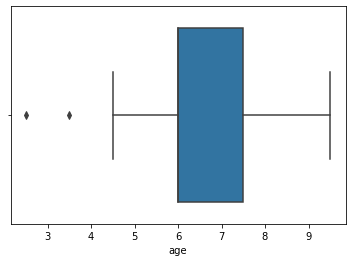

In [119]:
sns.boxplot(df['age'])

##  Check for Categorical columns and perform encoding.

In [120]:
# converting categorical values into numericalvalues - Encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
oneh = OneHotEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [121]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,6.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,6.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,6.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [122]:
df['age'] = le.fit_transform(df['age'])

In [123]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,4
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,4
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,4
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [124]:
df['Diameter'] = le.fit_transform(df['Diameter'])

In [125]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,0.455,56,0.095,0.5140,0.2245,0.1010,0.150,4
1,2,0.350,36,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,67,0.135,0.6770,0.2565,0.1415,0.210,4
3,2,0.440,56,0.125,0.5160,0.2155,0.1140,0.155,4
4,1,0.330,34,0.080,0.2050,0.0895,0.0395,0.055,7


In [126]:
df['Height'] = le.fit_transform(df['Height'])
df['Whole weight'] = le.fit_transform(df['Whole weight'])
df['Shucked weight'] = le.fit_transform(df['Shucked weight'])
df['Viscera weight'] = le.fit_transform(df['Viscera weight'])
df['Shell weight'] = le.fit_transform(df['Shell weight'])

In [127]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,0.455,56,18,715,417,199,263,4
1,2,0.350,36,17,285,178,94,113,7
2,0,0.530,67,26,962,480,280,374,4
3,2,0.440,56,24,718,400,225,273,4
4,1,0.330,34,15,253,159,76,87,7


### Split the data into dependent and independent variables

In [128]:
df.shape

(4177, 9)

In [129]:
x = df.iloc[:, 0:8]

In [130]:
x #independent values (inputs)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,56,18,715,417,199,263
1,2,0.350,36,17,285,178,94,113
2,0,0.530,67,26,962,480,280,374
3,2,0.440,56,24,718,400,225,273
4,1,0.330,34,15,253,159,76,87
...,...,...,...,...,...,...,...,...
4172,0,0.565,73,32,1289,698,475,442
4173,2,0.590,71,26,1411,832,426,463
4174,2,0.600,78,40,1727,994,571,550
4175,0,0.625,80,29,1610,1005,518,530


In [131]:
y = df['age']

In [132]:
y # dependent values (output)

0       4
1       7
2       4
3       4
4       7
       ..
4172    4
4173    4
4174    4
4175    4
4176    4
Name: age, Length: 4177, dtype: int64

### Scale the independent variables

In [133]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [134]:
x_scaled

array([[ 1.15198011, -0.57455813, -0.43232856, ..., -0.62848601,
        -0.74055949, -0.65546208],
       [ 1.15198011, -1.44898585, -1.44044354, ..., -1.24994198,
        -1.24207391, -1.30958261],
       [-1.28068972,  0.05003309,  0.12213469, ..., -0.46467125,
        -0.35367695, -0.17141288],
       ...,
       [ 1.15198011,  0.6329849 ,  0.67659793, ...,  0.87184913,
         1.03623442,  0.59608854],
       [-1.28068972,  0.84118198,  0.77740943, ...,  0.9004517 ,
         0.78308905,  0.50887247],
       [ 1.15198011,  1.54905203,  1.48308992, ...,  2.0861585 ,
         1.80522318,  1.74297987]])

### Split the data into training and testing

In [135]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x_scaled, y, test_size = 0.5, random_state = 0)

In [136]:
x_train

array([[-0.0643548 , -2.03193766, -1.94450104, ..., -1.43195837,
        -1.4999956 , -1.61483885],
       [-0.0643548 , -0.61619755, -0.53314005, ..., -0.78189982,
        -1.06534978, -0.73831734],
       [ 1.15198011,  0.13331192,  0.47497493, ...,  0.34920205,
         0.72577312,  0.28647149],
       ...,
       [ 1.15198011,  0.59134549,  0.42456918, ...,  0.57022196,
         0.26724566,  0.16436899],
       [-1.28068972,  0.84118198,  0.82781518, ...,  0.63522781,
         0.55382532,  0.67894381],
       [-0.0643548 , -0.94931287, -0.83557455, ..., -1.09132769,
        -0.98892854, -1.056656  ]])

In [137]:
x_test

array([[ 1.15198011,  0.21659075,  0.17254044, ..., -0.35806165,
         0.61591758,  0.81412872],
       [-0.0643548 , -0.1998034 , -0.07948831, ..., -0.44126914,
        -0.33934797, -0.29351538],
       [ 1.15198011,  0.79954256,  0.72700368, ...,  0.87964983,
         1.7908942 ,  0.674583  ],
       ...,
       [-1.28068972,  0.42478783,  0.77740943, ...,  0.34920205,
         0.81174702,  0.53503729],
       [-1.28068972,  1.13265788,  0.92862668, ...,  0.54681985,
         1.1365373 ,  1.05833372],
       [ 1.15198011,  0.84118198,  0.92862668, ...,  0.56242126,
         0.75443108,  0.56992372]])

In [138]:
x_test.shape

(2089, 8)

In [139]:
y_train

4149    6
315     8
1604    4
926     7
3077    4
       ..
1033    4
3264    4
1653    4
2607    4
2732    8
Name: age, Length: 2088, dtype: int64

In [140]:
y_train.shape

(2088,)

In [141]:
y_test

668     4
1580    8
3784    4
463     5
2615    4
       ..
795     4
2111    4
2192    4
557     4
4051    4
Name: age, Length: 2089, dtype: int64

In [142]:
y_test.shape

(2089,)

### Build the Model

In [143]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [162]:
y_pred = lr.predict(x_test)

In [163]:
y_pred

array([3.78892213, 5.28080253, 4.14627477, ..., 4.70230339, 2.57949859,
       4.10193328])

In [164]:
y_test

668     4
1580    8
3784    4
463     5
2615    4
       ..
1052    4
3439    8
1174    4
2210    4
2408    4
Name: age, Length: 1254, dtype: int64

### Train and Test the Model

In [165]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x_scaled, y, test_size = 0.3, random_state = 0)

In [166]:
x_train

array([[ 1.15198011,  0.79954256,  1.02943818, ...,  1.07986786,
         0.57293063,  1.19787943],
       [-0.0643548 , -1.49062526, -1.54125504, ..., -1.22653987,
        -1.35192944, -1.45348912],
       [-0.0643548 , -1.24078877, -1.33963204, ..., -1.27334409,
        -1.18475797, -1.33574743],
       ...,
       [ 1.15198011,  0.59134549,  0.42456918, ...,  0.57022196,
         0.26724566,  0.16436899],
       [-1.28068972,  0.84118198,  0.82781518, ...,  0.63522781,
         0.55382532,  0.67894381],
       [-0.0643548 , -0.94931287, -0.83557455, ..., -1.09132769,
        -0.98892854, -1.056656  ]])

In [167]:
y_train

1376    4
1225    5
2722    7
3387    4
2773    4
       ..
1033    4
3264    4
1653    4
2607    4
2732    8
Name: age, Length: 2923, dtype: int64

In [168]:
x_test

array([[ 1.15198011,  0.21659075,  0.17254044, ..., -0.35806165,
         0.61591758,  0.81412872],
       [-0.0643548 , -0.1998034 , -0.07948831, ..., -0.44126914,
        -0.33934797, -0.29351538],
       [ 1.15198011,  0.79954256,  0.72700368, ...,  0.87964983,
         1.7908942 ,  0.674583  ],
       ...,
       [-1.28068972,  0.92446081,  0.87822093, ...,  0.8016428 ,
         1.23206386,  0.44346042],
       [ 1.15198011,  1.13265788,  0.97903243, ...,  0.68203203,
         1.12698465,  2.07004014],
       [-0.0643548 ,  0.79954256,  0.77740943, ...,  0.65342945,
         1.19862956,  0.77924229]])

In [169]:
y_test

668     4
1580    8
3784    4
463     5
2615    4
       ..
1052    4
3439    8
1174    4
2210    4
2408    4
Name: age, Length: 1254, dtype: int64

### Evaluation Metrics

In [170]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

-2.6297976151497258

In [171]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x_scaled, y, test_size = 0.3, random_state = 0)

In [172]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(x_train,y_train)

C:\Users\balas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [173]:
pred_test = lor.predict(x_test)

In [174]:
pred_test

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [175]:
y_test

668     4
1580    8
3784    4
463     5
2615    4
       ..
1052    4
3439    8
1174    4
2210    4
2408    4
Name: age, Length: 1254, dtype: int64

In [176]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,0.455,56,18,715,417,199,263,4
1,2,0.350,36,17,285,178,94,113,7
2,0,0.530,67,26,962,480,280,374,4
3,2,0.440,56,24,718,400,225,273,4
4,1,0.330,34,15,253,159,76,87,7


### MAE

In [179]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 1.0869853753989087


### MSE

In [180]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 1.8324497224265603


### RMSE

In [181]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 1.353680066495241


### RMSLE

In [182]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE 0.30282685890006455


### R squared

In [183]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.2425967663967883


### Adjusted R Squared

In [184]:
n=40
k=2
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.201656051066885
